In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ggplot import *
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [84]:
#Next, let's import the dataset and take a quick view at its contents
df = pd.read_csv("us-vehicle-fuel-economy-data-1984-2017.csv", sep=';')
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(37129, 83)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,VClass,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Front-Wheel Drive,59007,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,26,0.0,0,0.0,Compact Cars,0.0,0.0,0.0,0,0,10009,0,15,Volkswagen,Jetta III,N,False,0,88,0,0.0,0.0,0.0,0.0,Automatic 4-spd,23.0000,0.0,36.0000,0.0,1993,-1250,NaN,2MODE CLKUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
1,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,6.0,3.3,Front-Wheel Drive,4410,(FFS),-1,1750,0,Regular,Regular Gasoline,-1,-1,24,0.0,0,0.0,Midsize Cars,0.0,0.0,0.0,0,0,10019,16,16,Buick,Century,Y,False,98,97,0,0.0,0.0,0.0,0.0,Automatic 3-spd,21.1111,0.0,33.0000,0.0,1993,-2000,NaN,CLKUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
2,20.600625,0.0,0.0,0.0,14,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,555.437500,16,0.0,0,0.0,0.0,0.0,0.0,8.0,4.0,Rear-Wheel Drive,12071,(GUZZLER) (FFS),-1,2500,0,Premium,Premium Gasoline,-1,-1,20,0.0,0,0.0,Midsize Cars,0.0,0.0,0.0,0,0,10015,0,13,BMW,740i,N,False,0,101,0,0.0,0.0,0.0,0.0,Automatic 5-spd,17.7778,0.0,28.0000,0.0,1993,-5750,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
3,16.480500,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,444.350000,20,0.0,0,0.0,0.0,0.0,0.0,6.0,3.3,Front-Wheel Drive,2611,(FFS),-1,1650,0,Regular,Regular Gasoline,-1,-1,24,0.0,0,0.0,Midsize Cars,0.0,0.0,0.0,0,0,10042,0,16,Dodge,Dynasty,N,False,0,99,0,0.0,0.0,0.0,0.0,Automatic 4-spd,22.0000,0.0,33.3333,0.0,1993,-1500,NaN,CLKUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
4,16.480500,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,444.350000,20,0.0,0,0.0,0.0,0.0,0.0,6.0,3.8,Front-Wheel Drive,4400,(FFS),-1,1650,0,Regular,Regular Gasoline,-1,-1,26,0.0,0,0.0,Midsize Cars,0.0,0.0,0.0,0,0,10023,16,16,Buick,Regal,Y,False,95,100,0,0.0,0.0,0.0,0.0,Automatic 4-spd,21.0000,0.0,36.0000,0.0,1993,-1500,NaN,CLKUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0


In [85]:
#resort the columns by identifying information at the front, then alphabetically
head = ['id', 'make', 'model', 'year', 'trany']
cols = [x for x in sorted((df)) if x not in head]
cols = head + cols
df = df[cols].sort_values(by='id')

#view the newly organized dataset
df.head()

,id,make,model,year,trany,UCity,UCityA,UHighway,UHighwayA,VClass,atvType,barrels08,barrelsA08,c240Dscr,c240bDscr,charge120,charge240,charge240b,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,createdOn,cylinders,displ,drive,engId,eng_dscr,evMotor,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,fuelType2,ghgScore,ghgScoreA,guzzler,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,lv2,lv4,mfrCode,modifiedOn,mpgData,phevBlended,phevCity,phevComb,phevHwy,pv2,pv4,range,rangeA,rangeCity,rangeCityA,rangeHwy,rangeHwyA,sCharger,startStop,tCharger,trans_dscr,youSaveSpend
33941,1,Alfa Romeo,Spider Veloce 2000,1985,Manual 5-spd,23.3333,0.0,35.000,0.0,Two Seaters,NaN,15.695714,0.0,NaN,NaN,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,2013-01-01,4.0,2.0,Rear-Wheel Drive,9011,(FFS),NaN,-1,1600,0,Regular,Regular Gasoline,NaN,-1,-1,NaN,25,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN,2013-01-01,Y,False,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-1250
2979,2,Bertone,X1/9,1985,Manual 5-spd,25.0000,0.0,36.000,0.0,Two Seaters,NaN,14.982273,0.0,NaN,NaN,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,403.954545,22,0.0,0,0.0,0.0,0.0,0.0,2013-01-01,4.0,1.5,Rear-Wheel Drive,12710,NaN,NaN,-1,1500,0,Regular,Regular Gasoline,NaN,-1,-1,NaN,26,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN,2013-01-01,Y,False,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-750
27386,3,Chevrolet,Corvette,1985,Automatic 4-spd,18.0000,0.0,29.000,0.0,Two Seaters,NaN,19.388824,0.0,NaN,NaN,0.0,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,522.764706,17,0.0,0,0.0,0.0,0.0,0.0,2013-01-01,8.0,5.7,Rear-Wheel Drive,4185,(350 V8) (FFS),NaN,-1,1950,0,Regular,Regular Gasoline,NaN,-1,-1,NaN,21,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN,2013-01-01,Y,False,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-3000
6311,4,Chevrolet,Corvette,1985,Manual 4-spd,18.0000,0.0,28.000,0.0,Two Seaters,NaN,19.388824,0.0,NaN,NaN,0.0,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,522.764706,17,0.0,0,0.0,0.0,0.0,0.0,2013-01-01,8.0,5.7,Rear-Wheel Drive,4185,(350 V8) (FFS),NaN,-1,1950,0,Regular,Regular Gasoline,NaN,-1,-1,NaN,20,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN,2013-01-01,N,False,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-3000
14021,5,Nissan,300ZX,1985,Automatic 4-spd,18.0000,0.0,24.359,0.0,Two Seaters,NaN,20.600625,0.0,NaN,NaN,0.0,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,555.437500,16,0.0,0,0.0,0.0,0.0,0.0,2013-01-01,6.0,3.0,Rear-Wheel Drive,38043,"(GUZZLER) (FFS,TRBO)",NaN,-1,2100,0,Regular,Regular Gasoline,NaN,-1,-1,T,18,0.0,0,0.0,0.0,0.0,0.0,23,50,0,0,NaN,2013-01-01,N,False,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,T,2MODE,-3750


In [86]:
#Redundant or non-useful attributes we'll remove:
#We remove fuelCost attributes on the basis that fuel prices change over time,
#so these attributes only encapsulate the fuelCost at a given time.
drop = ['UCity', 'UCityA', 'atvType', 'barrels08', 'barrelsA08', 'fuelType', \
       'UHighway', 'UHighwayA', 'createdOn', 'modifiedOn', 'cityA08U', 'city08U', \
       'co2', 'co2A', 'comb08U', 'combA08U', 'engId', 'eng_dscr', 'fuelCost08', \
       'fuelCostA08', 'guzzler', 'highway08U', 'highwayA08U', 'mfrCode', \
       'mpgData', 'trans_dscr', 'VClass', 'youSaveSpend']

#collect columns which are are mostly empty
empty_attrs = []
empty_vals = [np.NaN, 0, -1]
for col_name in cols:
    col = df[col_name]
    non_empty = [x for x in col if x not in empty_vals]
    #print(col_name, len(non_empty) / len(col))
    if len(non_empty) / len(col) < 0.01:
        empty_attrs.append(col_name)
        
#remove unwanted attributes
drop = list(set().union(empty_attrs, drop))
df = df.drop(drop, axis = 1)
df.head()

,id,make,model,year,trany,city08,cityA08,co2TailpipeAGpm,co2TailpipeGpm,comb08,combA08,cylinders,displ,drive,evMotor,feScore,fuelType1,fuelType2,ghgScore,ghgScoreA,highway08,highwayA08,hlv,hpv,lv2,lv4,pv2,pv4,rangeA,sCharger,startStop,tCharger
33941,1,Alfa Romeo,Spider Veloce 2000,1985,Manual 5-spd,19,0,0.0,423.190476,21,0,4.0,2.0,Rear-Wheel Drive,NaN,-1,Regular Gasoline,NaN,-1,-1,25,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2979,2,Bertone,X1/9,1985,Manual 5-spd,20,0,0.0,403.954545,22,0,4.0,1.5,Rear-Wheel Drive,NaN,-1,Regular Gasoline,NaN,-1,-1,26,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
27386,3,Chevrolet,Corvette,1985,Automatic 4-spd,15,0,0.0,522.764706,17,0,8.0,5.7,Rear-Wheel Drive,NaN,-1,Regular Gasoline,NaN,-1,-1,21,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
6311,4,Chevrolet,Corvette,1985,Manual 4-spd,15,0,0.0,522.764706,17,0,8.0,5.7,Rear-Wheel Drive,NaN,-1,Regular Gasoline,NaN,-1,-1,20,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
14021,5,Nissan,300ZX,1985,Automatic 4-spd,15,0,0.0,555.437500,16,0,6.0,3.0,Rear-Wheel Drive,NaN,-1,Regular Gasoline,NaN,-1,-1,18,0,23,50,0,0,0,0,NaN,NaN,NaN,T


In [87]:
#This commented out 3 lines below can be used to print out the range of values for the 
#categorical variables we wanted to create dummies for and was used to help
#write the dummy creator code below it.
#cats = ['trany', 'drive', 'sCharger', 'tCharger', 'startStop', 'fuelType1', 'fuelType2']
#for cat in cats:
#    print(cat, df[cat].unique())

#before we can convert -1 vals to NaN, we need to convert the columns with -1 vals to type float
cols = ['ghgScore', 'ghgScoreA', 'feScore']
df[cols] = df[cols].applymap(float)

#create our dummy vars for each row of data
for ix, row in df.iterrows():
    trans = row['trany']
    drive = row['drive']
    f1 = row['fuelType1']
    f2 = row['fuelType2']
    sCharge = row['sCharger']
    tCharge = row['tCharger']
    ss = row['startStop']
     
    #transmission will be split into 3 attributes the dummies manual? and automatic?, 
    #and the numeric attribute gears. Not all cars have a transmission recorded however.
    if type(trans) == str:
        df.set_value(ix, 'manual?', 1 if 'Manual' in trans else 0)
        df.set_value(ix, 'automatic?', 1 if 'Auto' in trans else 0)
        gears = re.findall(r'\d+', trans)
        if len(gears) > 0:
            df.set_value(ix, 'gears', gears[0])
    
    #next we'll tidy up drive. drive is recorded inconsistently, sometimes as front wheel,
    #rear wheel, or all wheel, or sometimes simply as 2 wheel or 4 wheel. We simplify
    #the attribute to the simple dummies 2-wheel?, 4-wheel?, rear? and front?
    if type(drive) == str:
        df.set_value(ix, '2WheelDrive?', 1 if 'Rear' in drive or 'Front' in drive or '2' in drive else 0)
        df.set_value(ix, '4WheelDrive?', 1 if 'All' in drive or '4' in drive else 0)
        df.set_value(ix, 'rear?', 1 if 'Rear' in drive else 0)
        df.set_value(ix, 'front?', 1 if 'Front' in drive else 0)
        
    #next are the the fuelType vars. We'll split fuelType1 into dummies based on type
    #and create a single fuelType2? dummy.
    df.set_value(ix, 'regularGas?', 1 if 'Regular' in f1 else 0)
    df.set_value(ix, 'premiumGas?', 1 if 'Premium' in f1 else 0)
    df.set_value(ix, 'midgradeGas?', 1 if 'Midgrade' in f1 else 0)
    df.set_value(ix, 'diesel?', 1 if 'Diesel' in f1 else 0)
    df.set_value(ix, 'naturalGas?', 1 if 'Natural' in f1 else 0)
    df.set_value(ix, 'electric?', 1 if 'Electric' in f1 else 0)
    df.set_value(ix, 'fuelType2?', 1 if type(f2) == str else 0)
    
    #finally dummies for the turbo and super charged and startStop attributes
    df.set_value(ix, 'tCharger', 1 if type(tCharge) == str else 0)
    df.set_value(ix, 'sCharger', 1 if type(sCharge) == str else 0)
    df.set_value(ix, 'startStop', 1 if type(ss) == str and ss == 'Y' else 0)
    
    #lastly, replace -1 empty values with NaNs.
    if row['ghgScore'] == -1:
        df.set_value(ix, 'ghgScore', np.NaN)
    if row['ghgScoreA'] == -1:
        df.set_value(ix, 'ghgScoreA', np.NaN)
    if row['feScore'] == -1:
        df.set_value(ix, 'feScore', np.NaN)
    
#now let's delete our older attributes we no longer need and sort the attributes as before
drop = ['fuelType1', 'drive', 'trany']
df = df.drop(drop, axis = 1)
head = ['id', 'make', 'model', 'year']
cols = [x for x in sorted((df)) if x not in head]
cols = head + cols
df = df[cols].sort_values(by='id')
df.head()

,id,make,model,year,2WheelDrive?,4WheelDrive?,automatic?,city08,cityA08,co2TailpipeAGpm,co2TailpipeGpm,comb08,combA08,cylinders,diesel?,displ,electric?,evMotor,feScore,front?,fuelType2,fuelType2?,gears,ghgScore,ghgScoreA,highway08,highwayA08,hlv,hpv,lv2,lv4,manual?,midgradeGas?,naturalGas?,premiumGas?,pv2,pv4,rangeA,rear?,regularGas?,sCharger,startStop,tCharger
33941,1,Alfa Romeo,Spider Veloce 2000,1985,1.0,0.0,0.0,19,0,0.0,423.190476,21,0,4.0,0.0,2.0,0.0,NaN,NaN,0.0,NaN,0.0,5,NaN,NaN,25,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,NaN,1.0,1.0,0,0,0
2979,2,Bertone,X1/9,1985,1.0,0.0,0.0,20,0,0.0,403.954545,22,0,4.0,0.0,1.5,0.0,NaN,NaN,0.0,NaN,0.0,5,NaN,NaN,26,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,NaN,1.0,1.0,0,0,0
27386,3,Chevrolet,Corvette,1985,1.0,0.0,1.0,15,0,0.0,522.764706,17,0,8.0,0.0,5.7,0.0,NaN,NaN,0.0,NaN,0.0,4,NaN,NaN,21,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,NaN,1.0,1.0,0,0,0
6311,4,Chevrolet,Corvette,1985,1.0,0.0,0.0,15,0,0.0,522.764706,17,0,8.0,0.0,5.7,0.0,NaN,NaN,0.0,NaN,0.0,4,NaN,NaN,20,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,NaN,1.0,1.0,0,0,0
14021,5,Nissan,300ZX,1985,1.0,0.0,1.0,15,0,0.0,555.437500,16,0,6.0,0.0,3.0,0.0,NaN,NaN,0.0,NaN,0.0,4,NaN,NaN,18,0,23,50,0,0,0.0,0.0,0.0,0.0,0,0,NaN,1.0,1.0,0,0,1




## II. Initial Plots and Data Analysis

To start out, we want to get a feel for the center and spread for our dependent variables and how these change over time. A violin plot is a helpful visualization for this. This type of graph similar to a box plot in that for each year, it shows the median (labeled by a dot in the center) and the inner quartile range surrounding it, but these details are surrounded by a probability distribution for each value in the year's range. This distribution makes skews in the graph slightly clearer and also points out when a graph is multimodal. 

Below, we generate violin plots for how highway gas mileage, city gas mileage, and CO2 emission readings have changed in car models over time. 

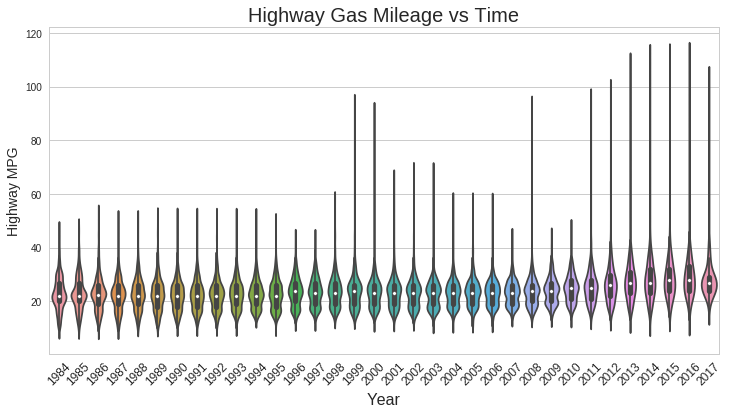

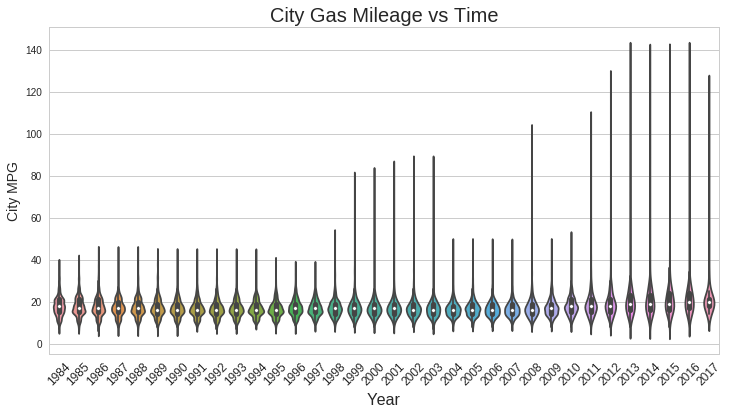

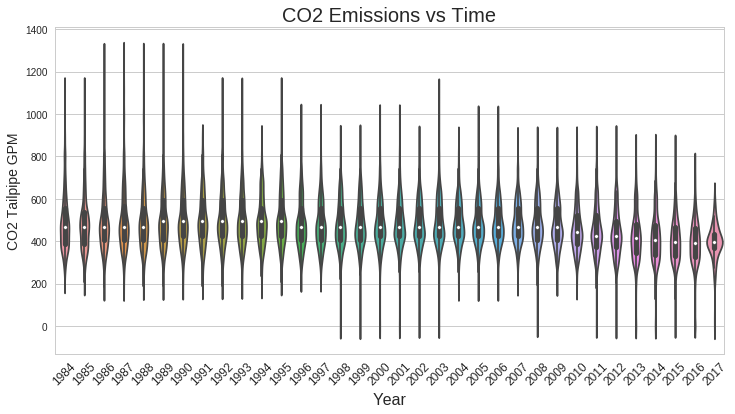

In [88]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,6))
ax = sns.violinplot(x="year", y="highway08", data=df)
plt.title('Highway Gas Mileage vs Time', fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Highway MPG', fontsize=14)
plt.show()

plt.figure(figsize=(12,6))
ax = sns.violinplot(x="year", y="city08", data=df)
plt.title('City Gas Mileage vs Time', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('City MPG', fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

plt.figure(figsize=(12,6))
ax = sns.violinplot(x="year", y="co2TailpipeGpm", data=df)
plt.title('CO2 Emissions vs Time', fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.xlabel('Year', fontsize=16)
plt.ylabel('CO2 Tailpipe GPM', fontsize=14)
plt.show()

As you can see, each of these graphs show extremely high peaks relative to the mean, and for CO2 emissions, there are many years where both the peaks and low values are very far from the mean. As we will confirm later, these high values for gas mileage (and low values for CO2 emissions) can be accounted for by cars with alternative fuel types. 

If you look closely at the medians in the graphs (indicated by white dots in the wider area of each plot), you can notice that they do increase slightly over time in the gas mileage plots and decrease slightly over time in the CO2 emissions plot. However, because of the width of the scale, this relatively modest slope is hard to see.

We can better examine the change in center for each of these variables by plotting the means for each year in scatter plots.

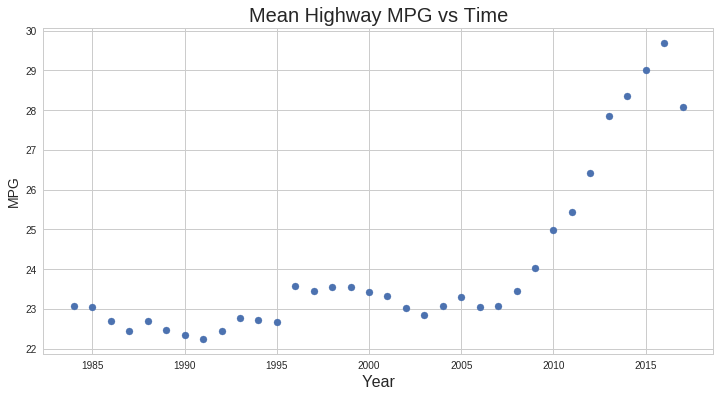

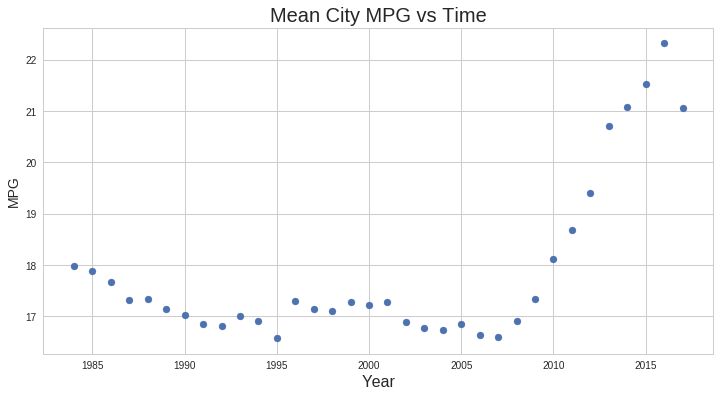

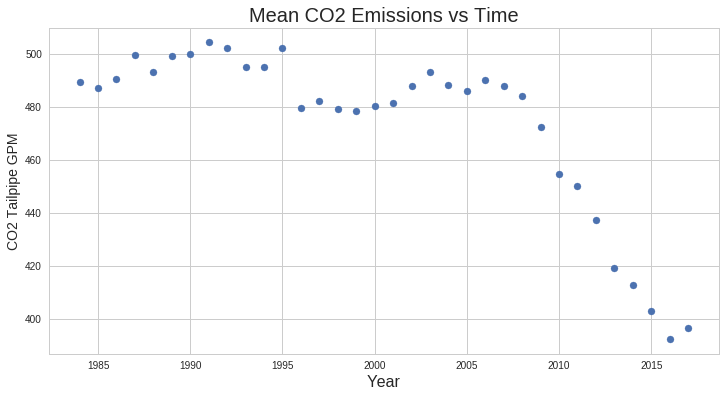

In [89]:
groups = df.groupby(['year'])
group_agg = groups.aggregate(np.mean)
collapsed_group_agg = pd.DataFrame(columns = ['year', 'meanHighway', 'meanCity', 'meanCO2'])
for i in range(len(group_agg)):
    row = {
        'year': group_agg.iloc[i].name,
        'meanHighway': group_agg.iloc[i].highway08,
        'meanCity': group_agg.iloc[i].city08,
        'meanCO2': group_agg.iloc[i].co2TailpipeGpm
    }
    collapsed_group_agg = collapsed_group_agg.append(row, ignore_index=True)

plt.figure(figsize=(12,6))
plt.title("Mean Highway MPG vs Time", fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('MPG', fontsize=14)
plt.scatter(collapsed_group_agg['year'], collapsed_group_agg['meanHighway'])
plt.show()
    
plt.figure(figsize=(12,6))
plt.title("Mean City MPG vs Time", fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('MPG', fontsize=14)
plt.scatter(collapsed_group_agg['year'], collapsed_group_agg['meanCity'])
plt.show()

plt.figure(figsize=(12,6))
plt.title("Mean CO2 Emissions vs Time", fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('CO2 Tailpipe GPM', fontsize=14)
plt.scatter(collapsed_group_agg['year'], collapsed_group_agg['meanCO2'])
plt.show()

These plots provide us with a much clearer picture of the trends of these variables over time. However, the mean is still an imperfect metric for central tendency in this dataset given the extreme outliers (we chose it for a scatter plot because it yields non-discrete values, highlighting differences between relatively similar years). We'll find it helpful later to break our dataset up by fuel type and analyze these sets separately. 



### Everything below this is for the brand-specific analysis. We're probably not using all of this, but I'm leaving it here in case we want to use some of it (not going to do a write-up for it though, because that would be silly)

In [90]:
# There are a lot of car companies, not all of which are particularly important
# We probably want to narrow down brand-specific analysis to these companies 
# (or at least a similar set if one of you wants to add some)
topBrandsUsa = ['Ford', 'Chevrolet', 'Toyota', 'Nissan', 'Honda', 'Jeep', 'Hyundai', 'Dodge', 'Subaru', 'Kia']

Basis For Picking Car Brands (might want a better source, though these are probably 
more or less the ones we care about anyway)

http://www.goodcarbadcar.net/2016/02/usa-auto-sales-brand-results-january-2016.html

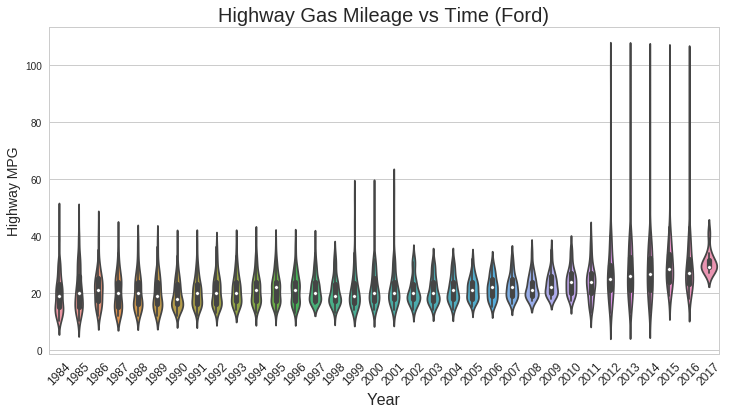

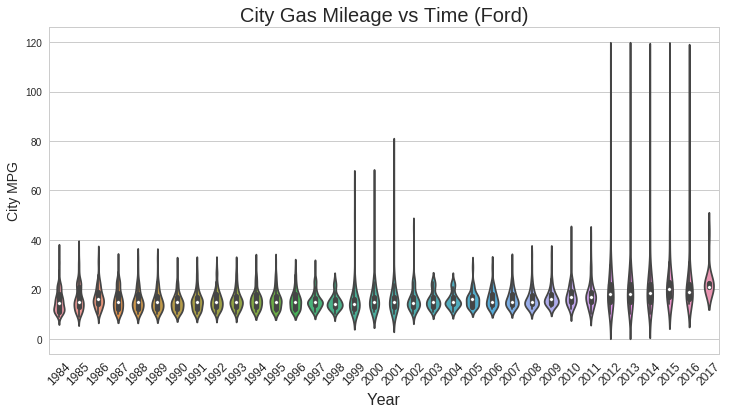

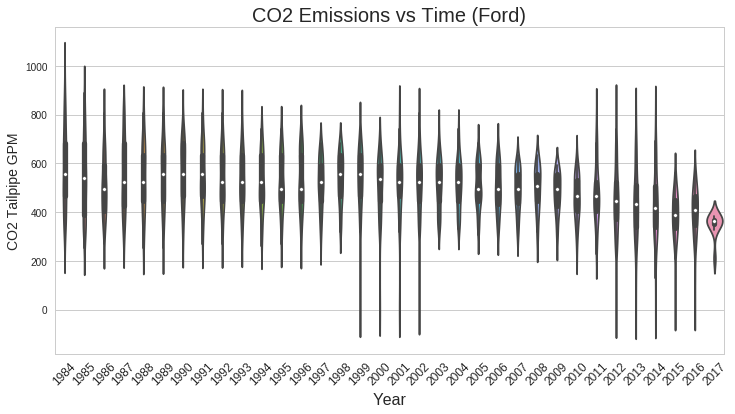

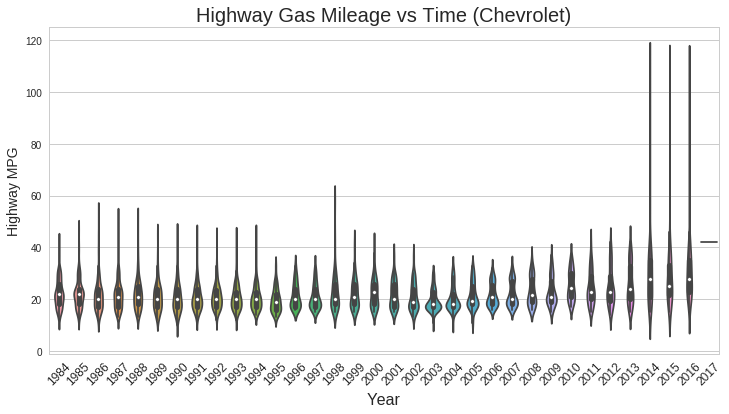

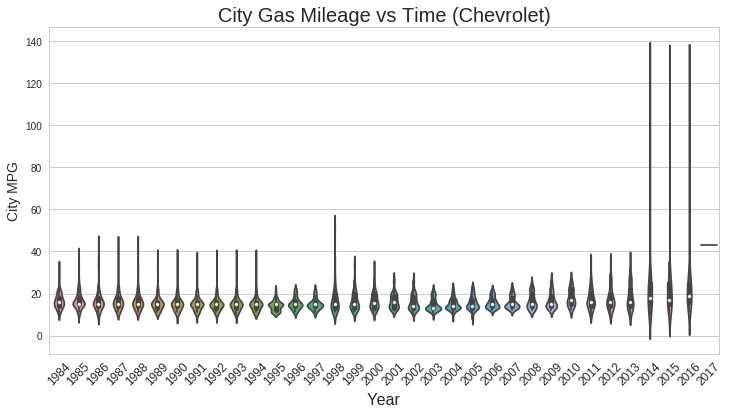

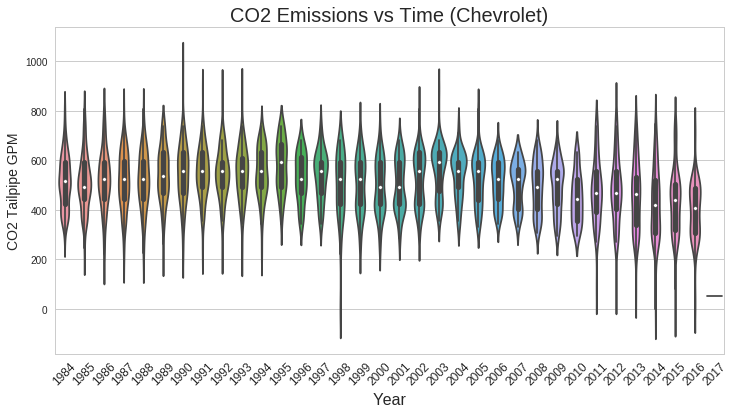

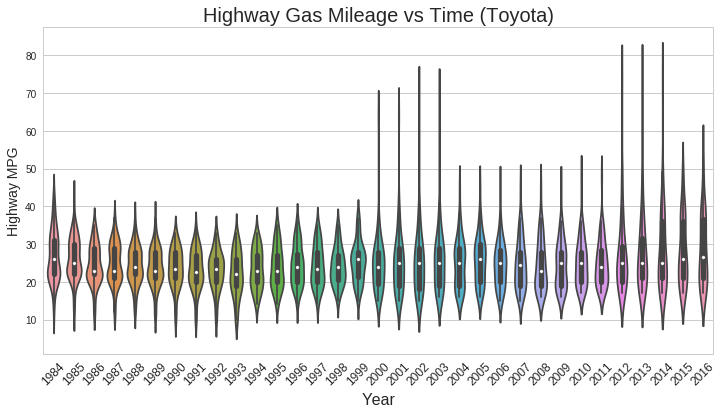

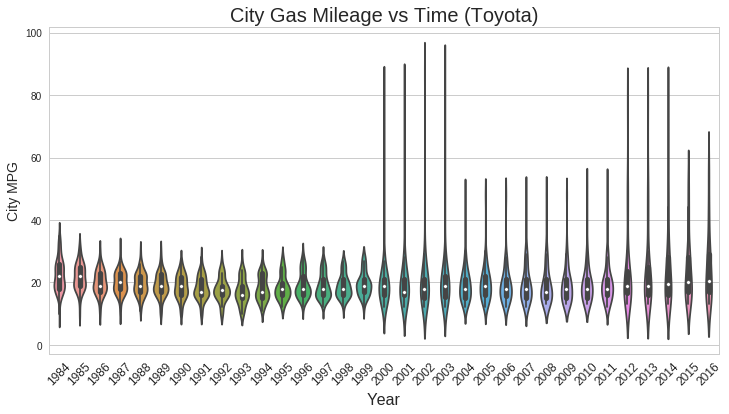

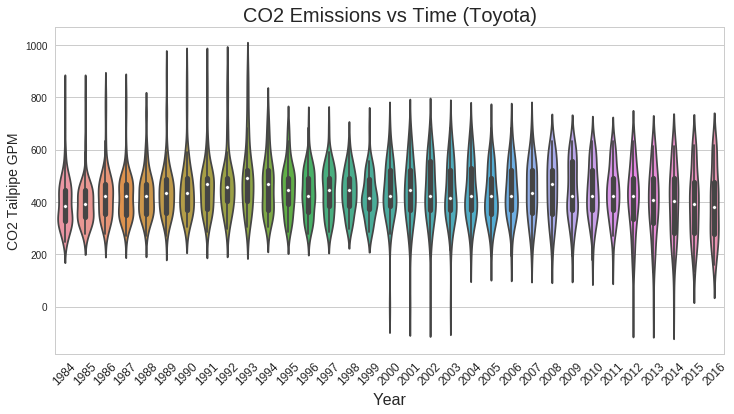

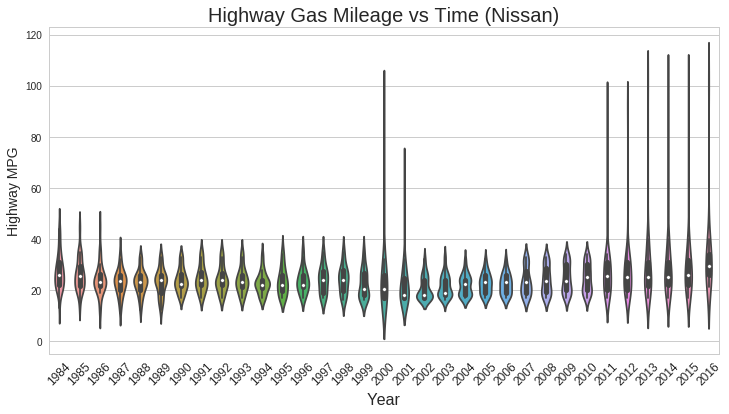

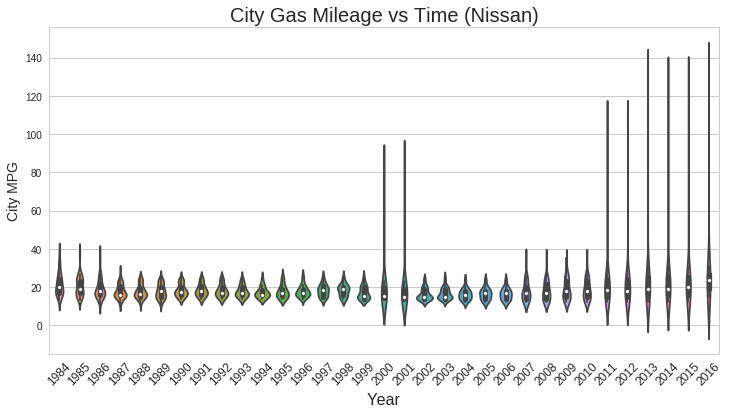

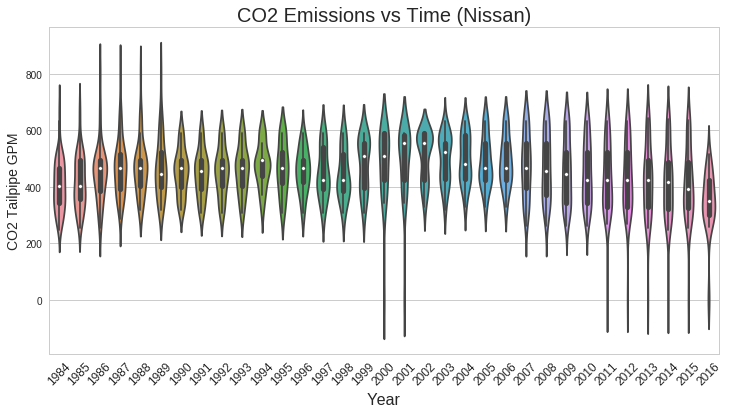

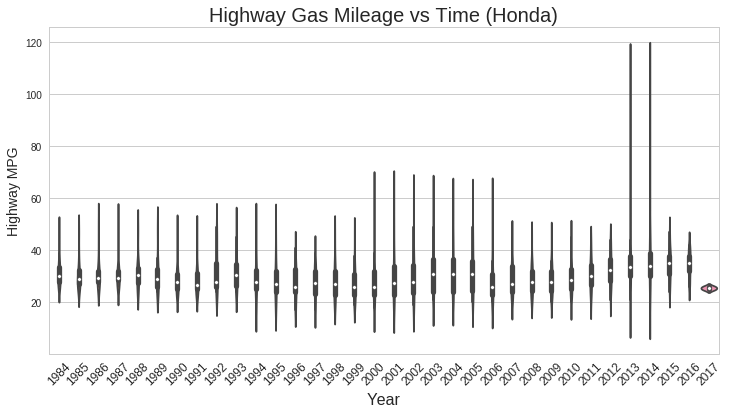

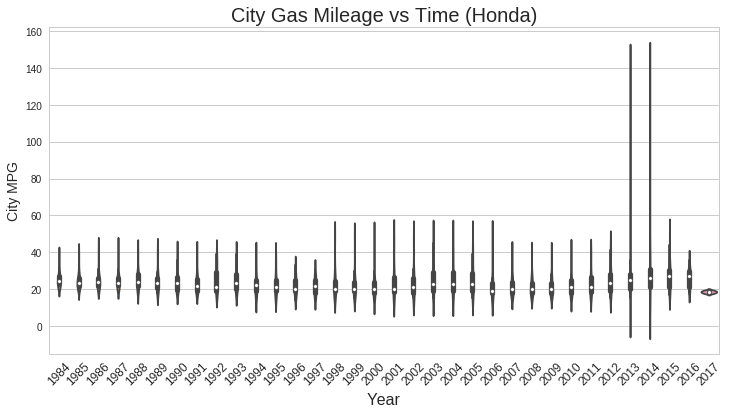

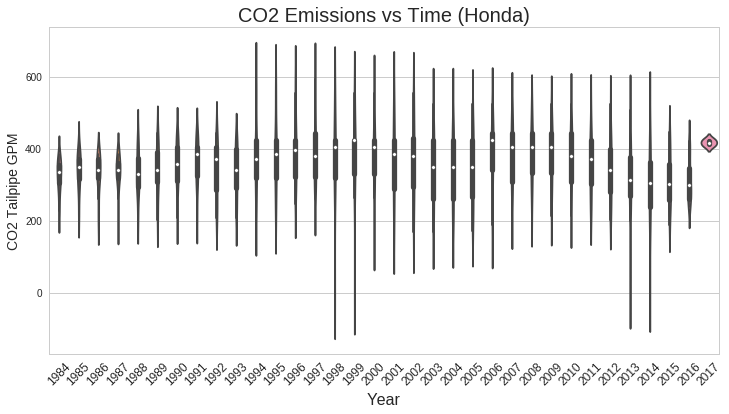

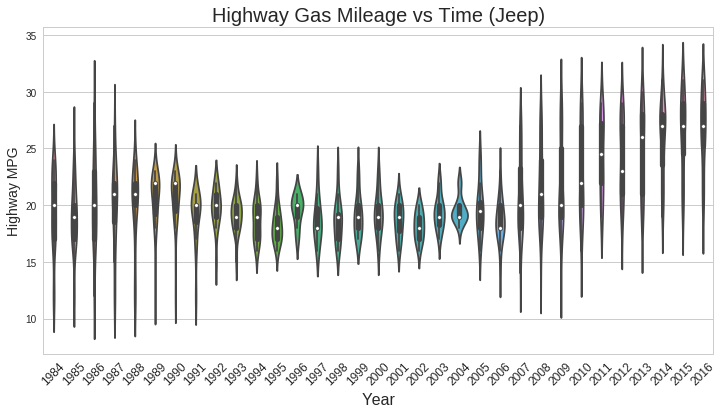

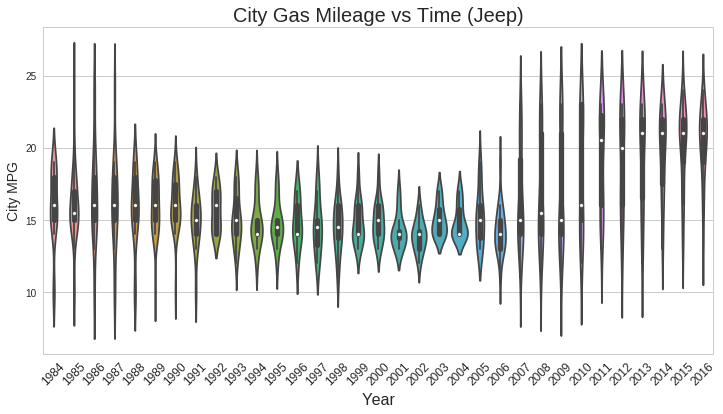

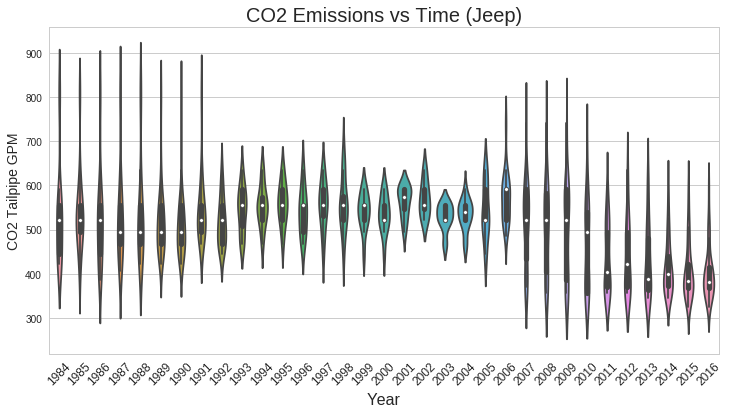

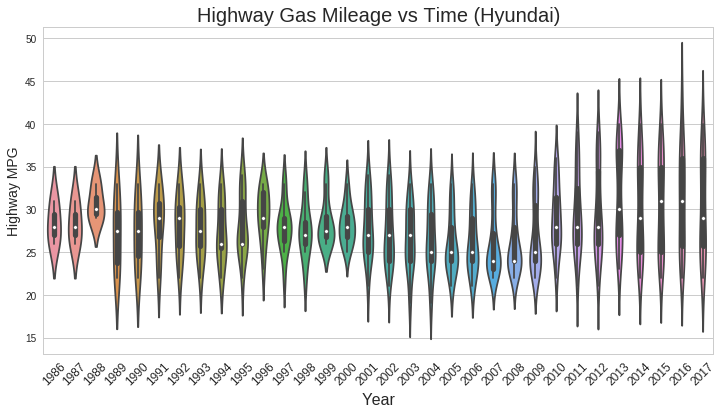

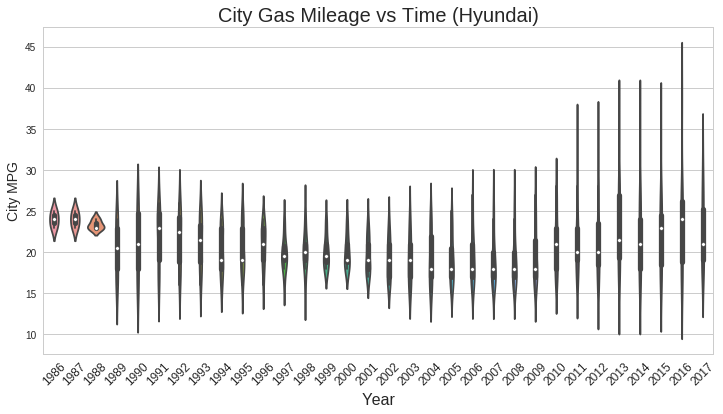

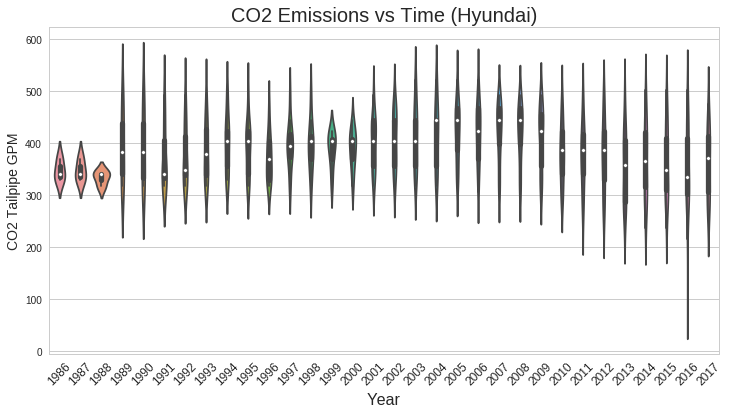

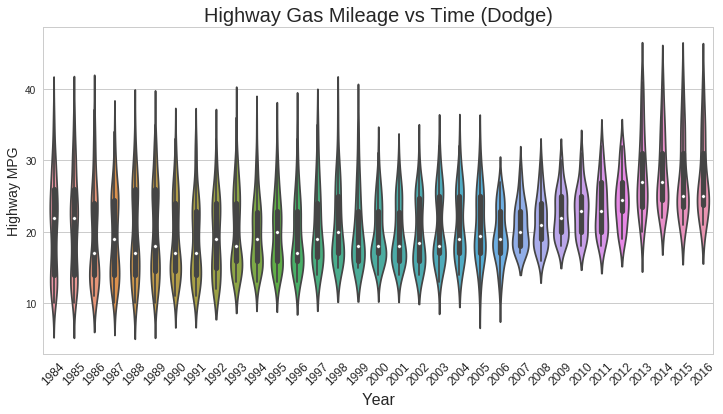

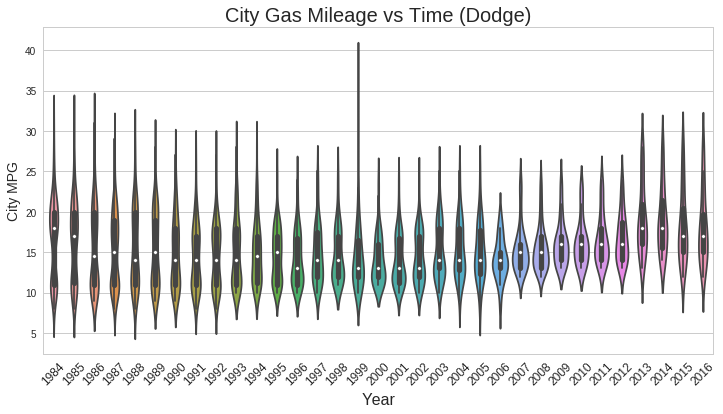

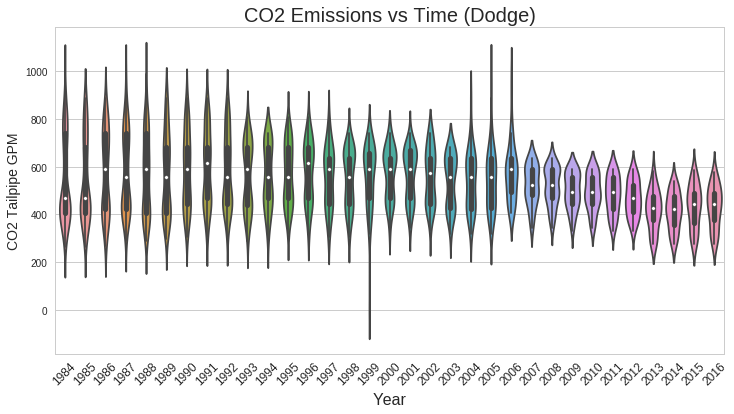

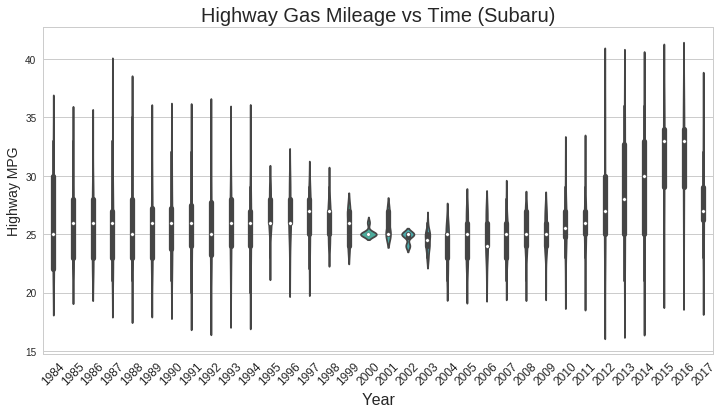

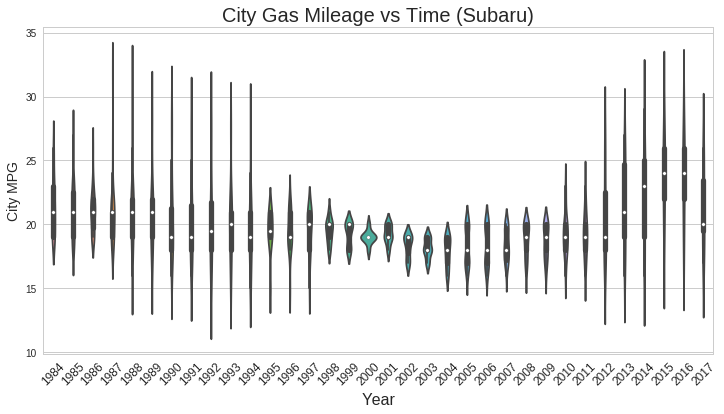

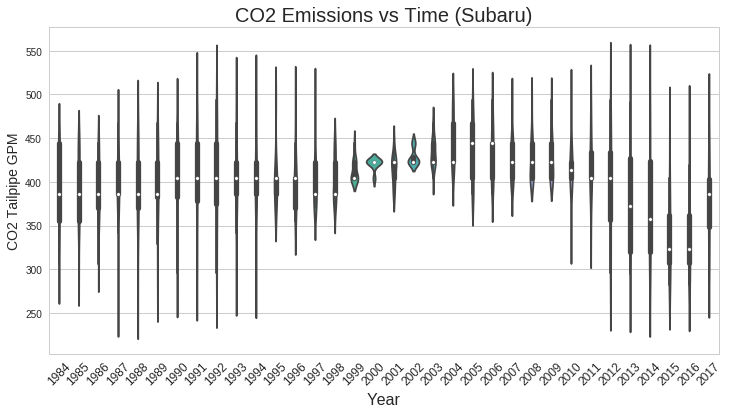

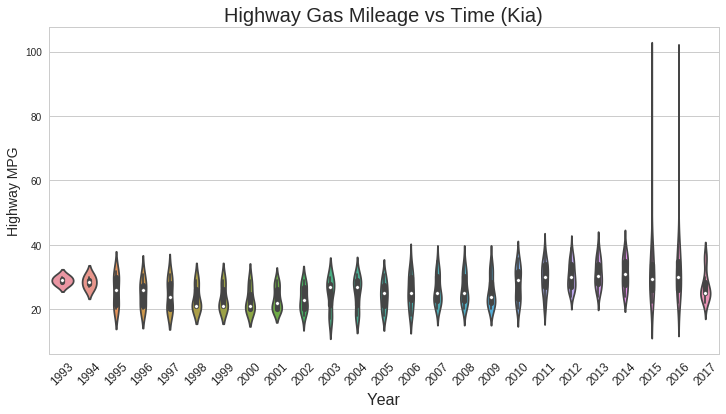

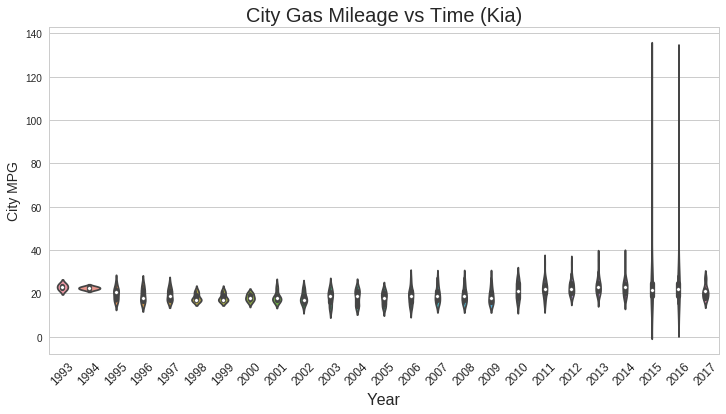

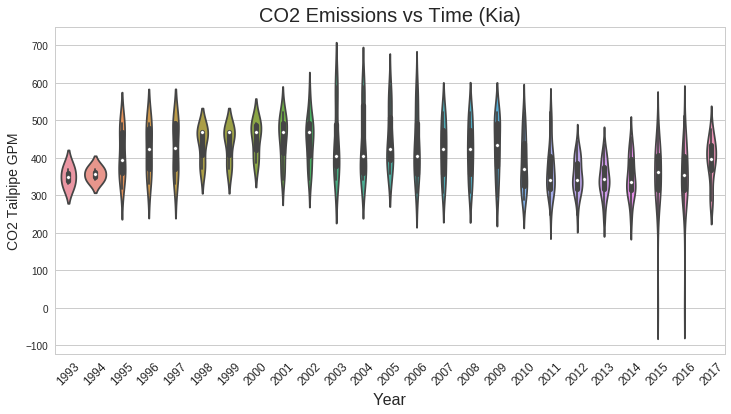

In [91]:
# Violin plots for all of the "major brands"

sns.set_style("whitegrid")

for make in topBrandsUsa:
    currMakeRows = df.loc[df['make'] == make]
    
    plt.figure(figsize=(12,6))
    ax = sns.violinplot(x="year", y="highway08", data=currMakeRows)
    plt.title('Highway Gas Mileage vs Time (' + make + ')', fontsize=20)
    plt.setp(ax.get_xticklabels(), rotation=45, fontsize=12)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Highway MPG', fontsize=14)
    plt.show()
    
    plt.figure(figsize=(12,6))
    ax = sns.violinplot(x="year", y="city08", data=currMakeRows)
    plt.title('City Gas Mileage vs Time (' + make + ')', fontsize=20)
    plt.setp(ax.get_xticklabels(), rotation=45, fontsize=12)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('City MPG', fontsize=14)
    plt.show()
    
    plt.figure(figsize=(12,6))
    ax = sns.violinplot(x="year", y="co2TailpipeGpm", data=currMakeRows)
    plt.title('CO2 Emissions vs Time (' + make + ')', fontsize=20)
    plt.setp(ax.get_xticklabels(), rotation=45, fontsize=12)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('CO2 Tailpipe GPM', fontsize=14)
    plt.show()

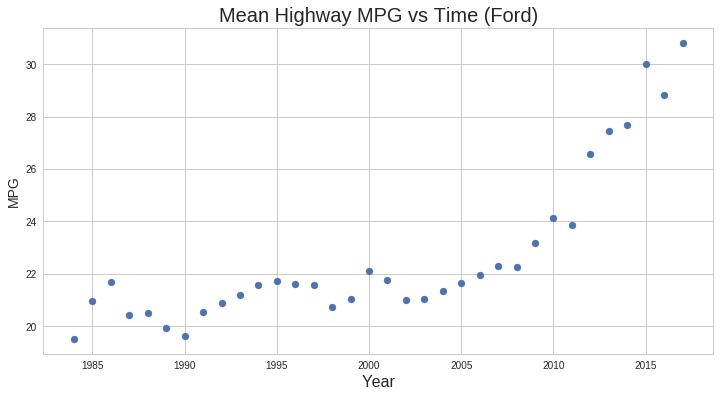

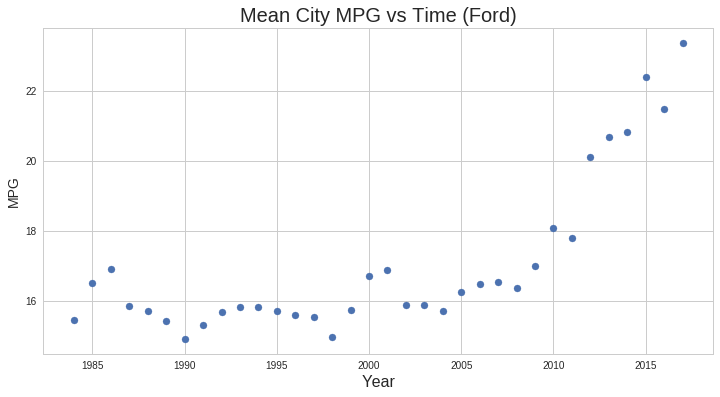

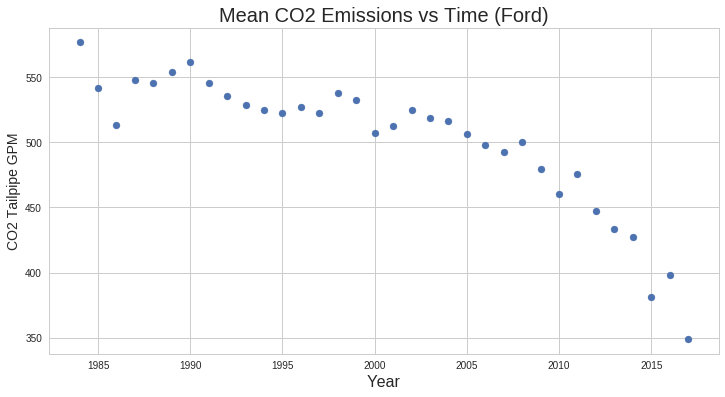

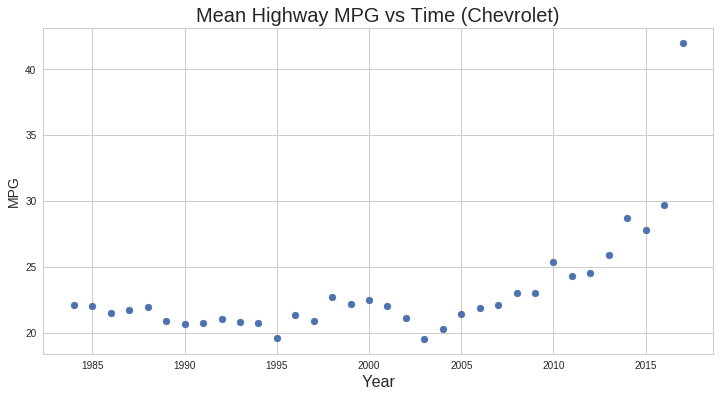

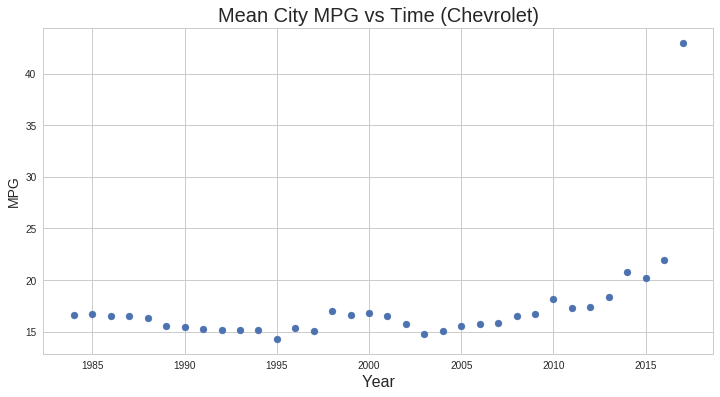

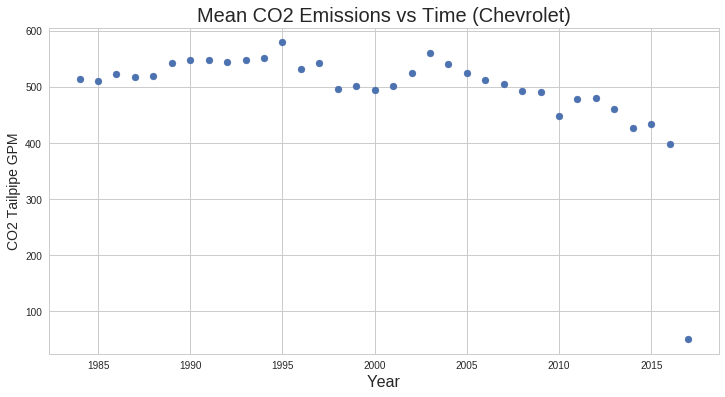

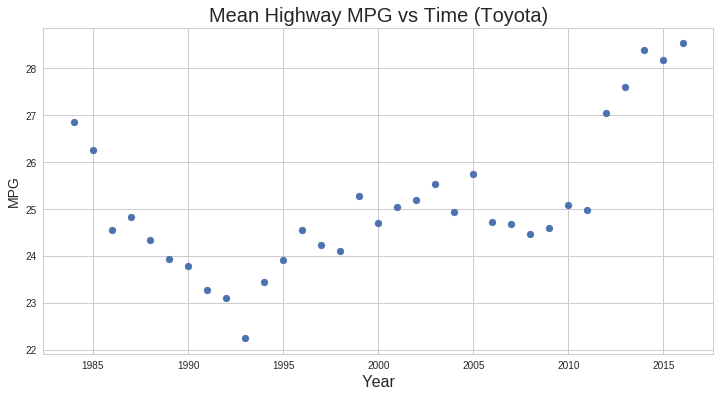

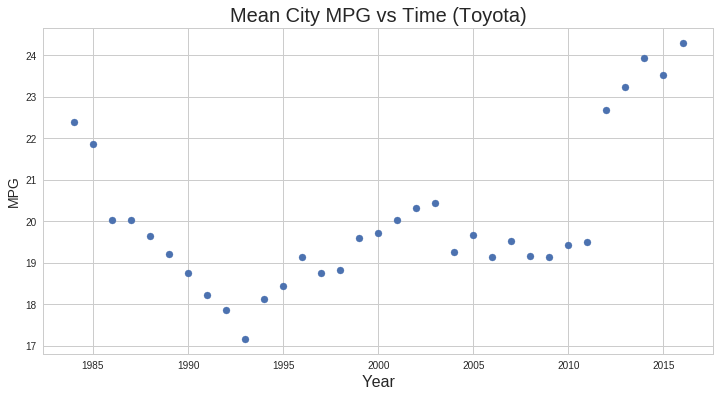

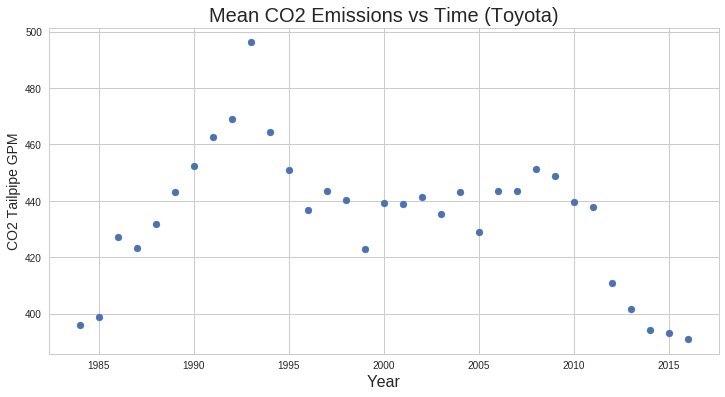

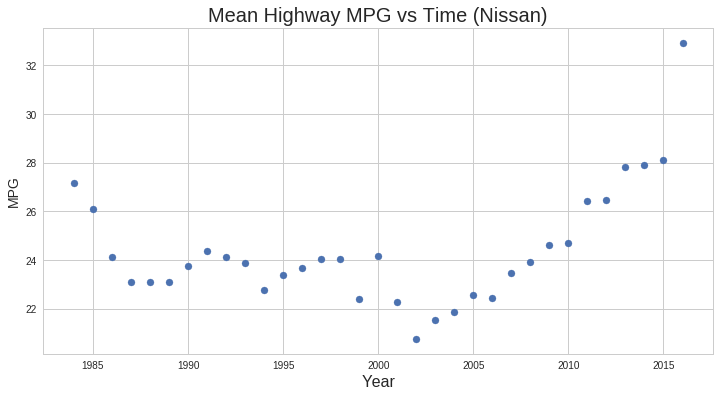

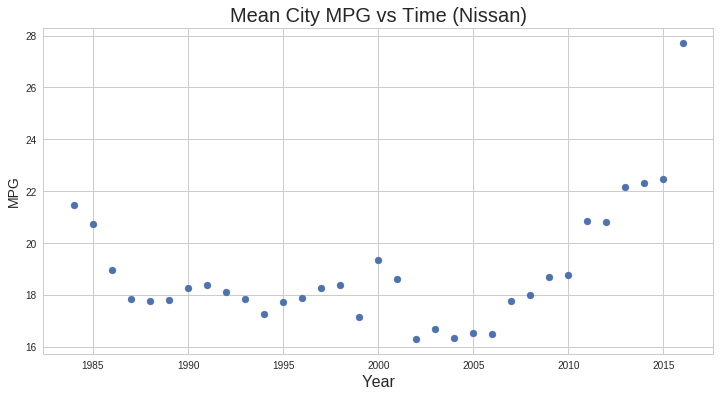

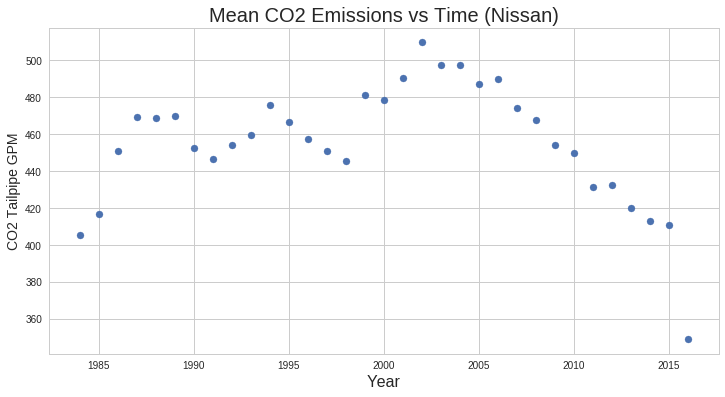

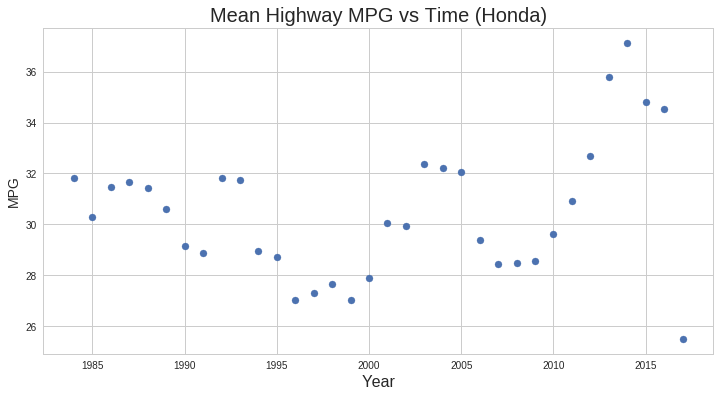

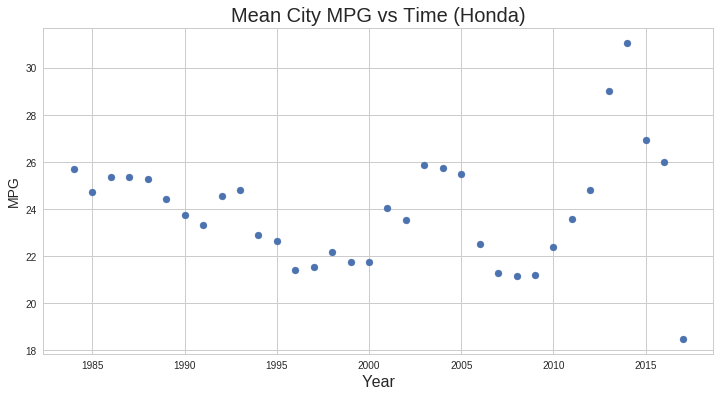

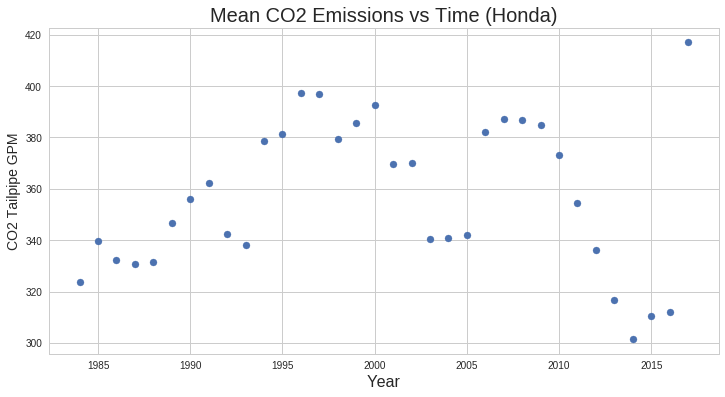

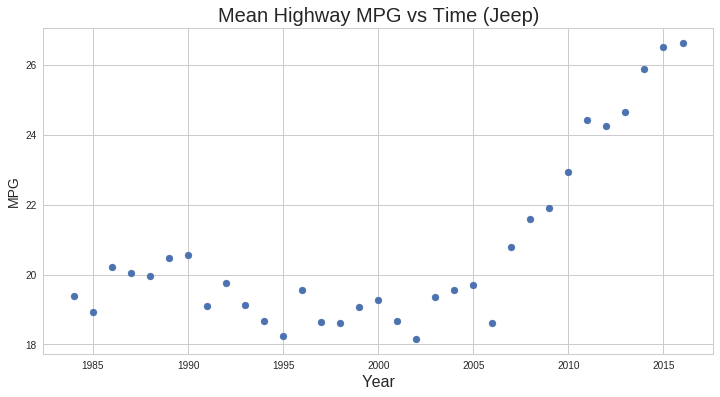

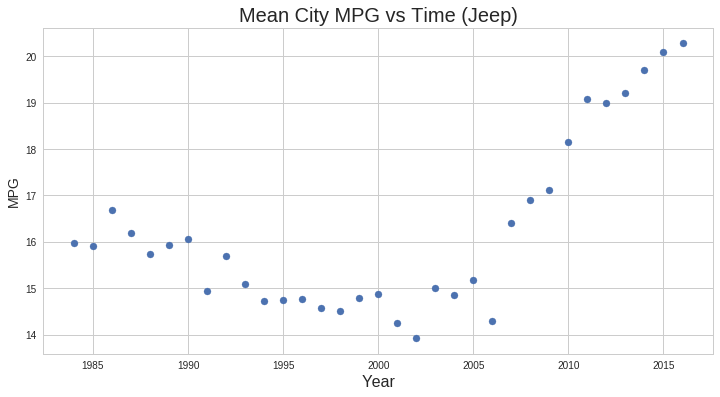

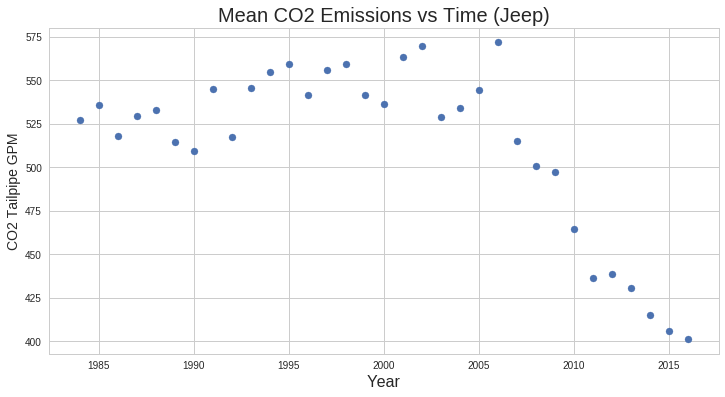

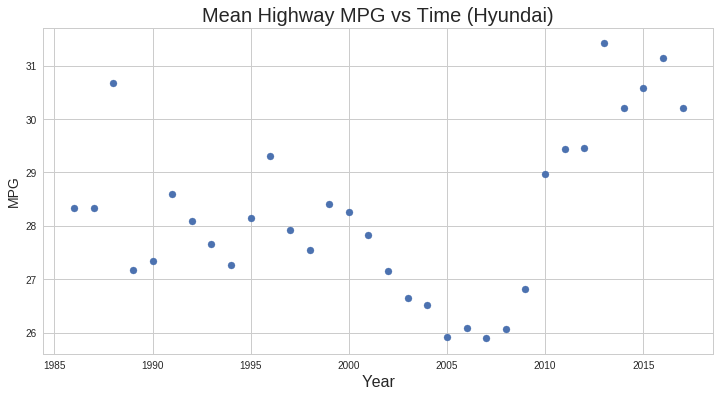

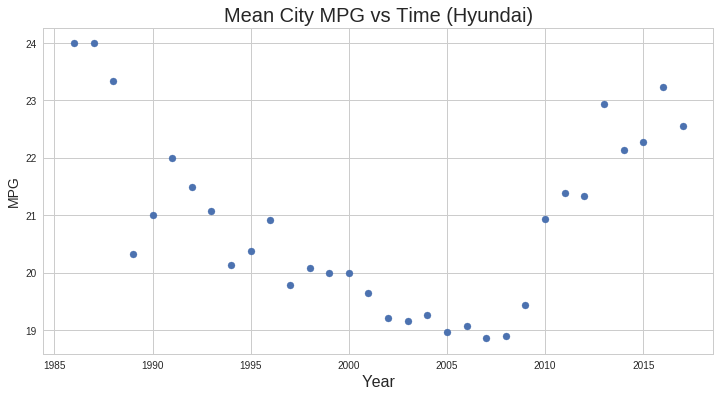

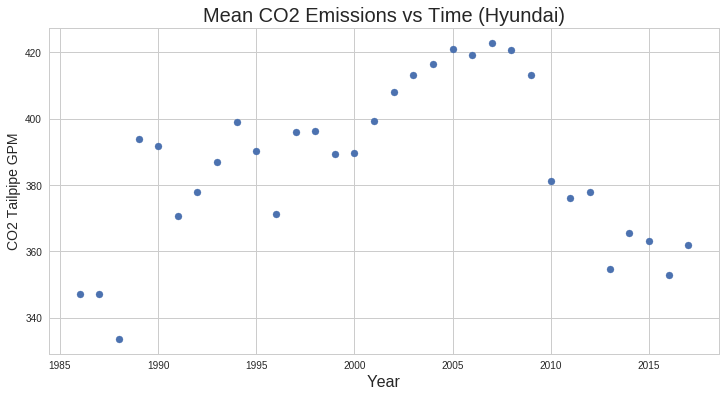

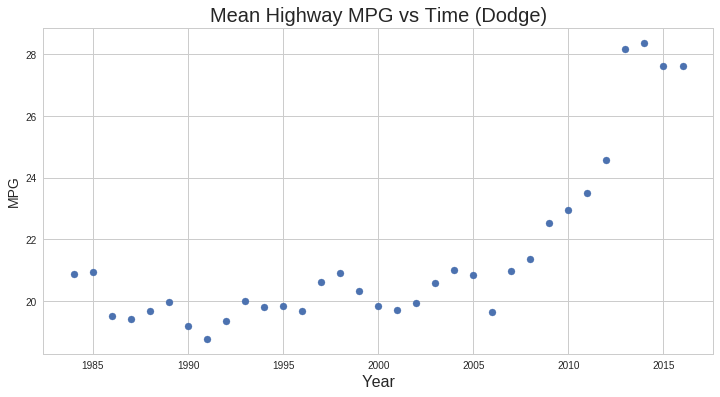

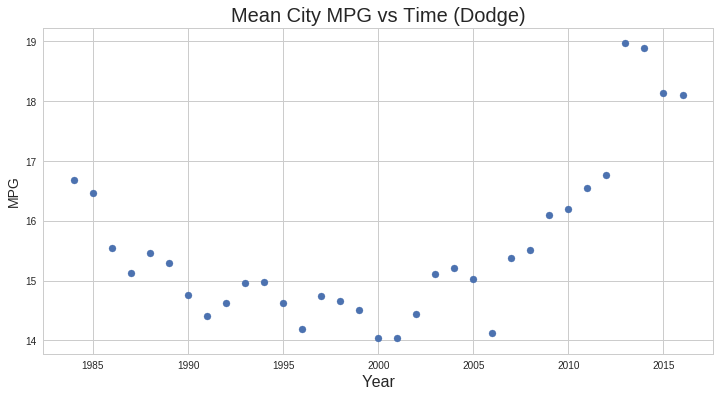

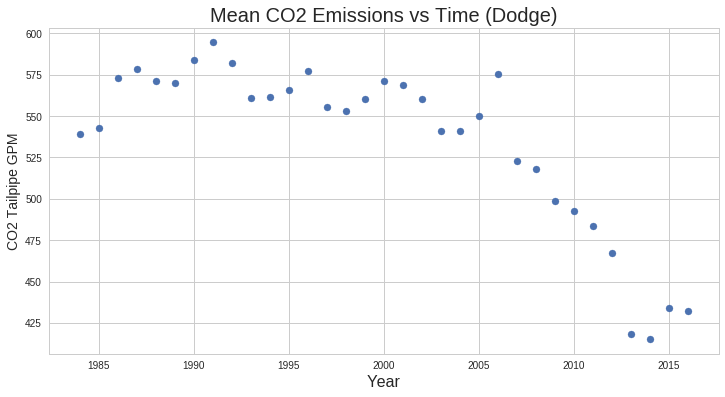

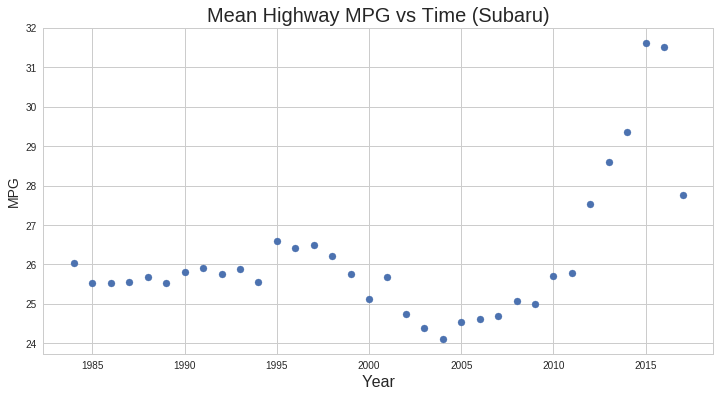

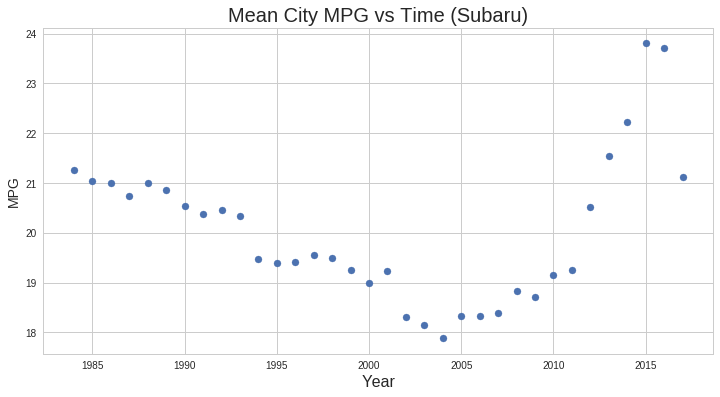

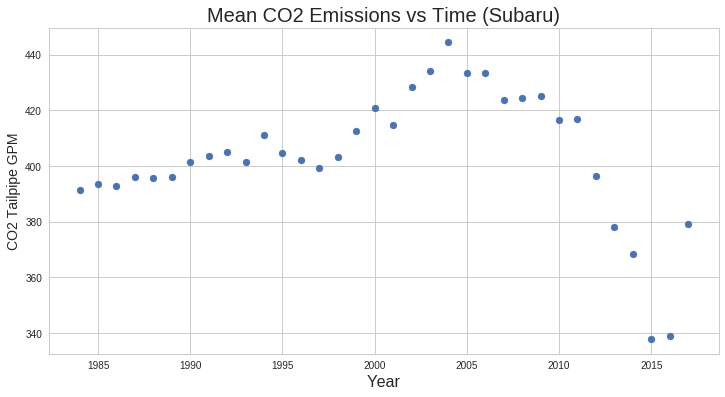

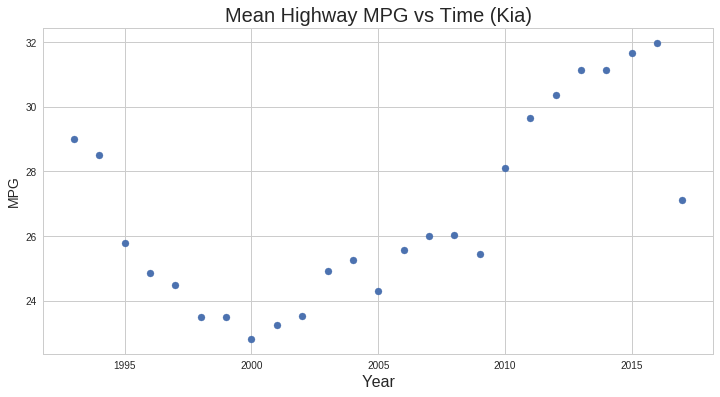

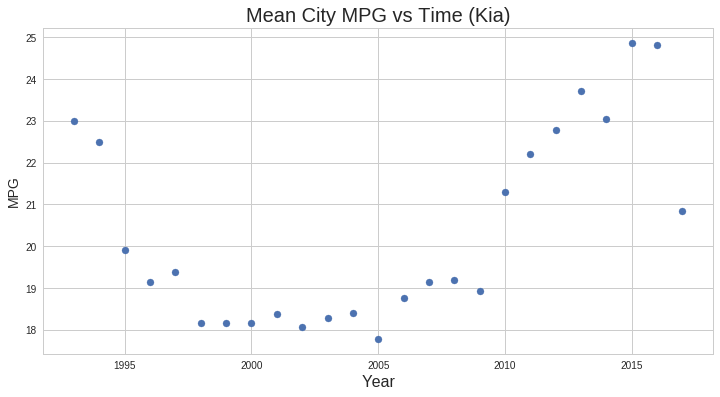

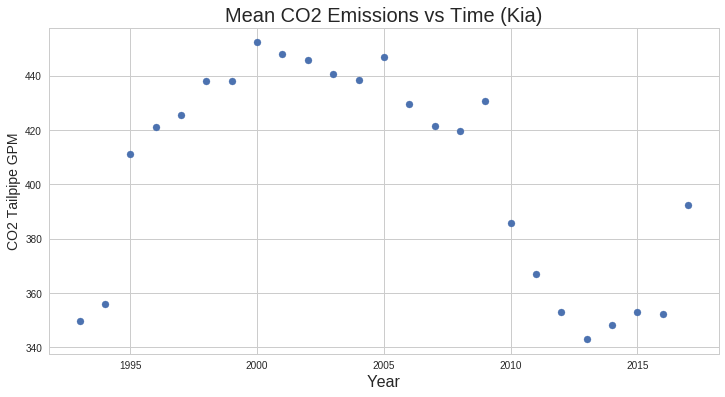

In [92]:
for make in topBrandsUsa:
    currMakeRows = df.loc[df['make'] == make]
    
    groups = currMakeRows.groupby(['year'])
    group_agg = groups.aggregate(np.mean)
    collapsed_group_agg = pd.DataFrame(columns = ['year', 'meanHighway', 'meanCity', 'meanCO2'])
    for i in range(len(group_agg)):
        row = {
            'year': group_agg.iloc[i].name,
            'meanHighway': group_agg.iloc[i].highway08,
            'meanCity': group_agg.iloc[i].city08,
            'meanCO2': group_agg.iloc[i].co2TailpipeGpm
        }
        collapsed_group_agg = collapsed_group_agg.append(row, ignore_index=True)

    plt.figure(figsize=(12,6))
    plt.title("Mean Highway MPG vs Time (" + make + ")", fontsize=20)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('MPG', fontsize=14)
    plt.scatter(collapsed_group_agg['year'], collapsed_group_agg['meanHighway'])
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.title("Mean City MPG vs Time (" + make + ")", fontsize=20)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('MPG', fontsize=14)
    plt.scatter(collapsed_group_agg['year'], collapsed_group_agg['meanCity'])
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.title("Mean CO2 Emissions vs Time (" + make + ")", fontsize=20)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('CO2 Tailpipe GPM', fontsize=14)
    plt.scatter(collapsed_group_agg['year'], collapsed_group_agg['meanCO2'])
    plt.show()